# Energy for Variational Approach with and without Depletion 

4
4


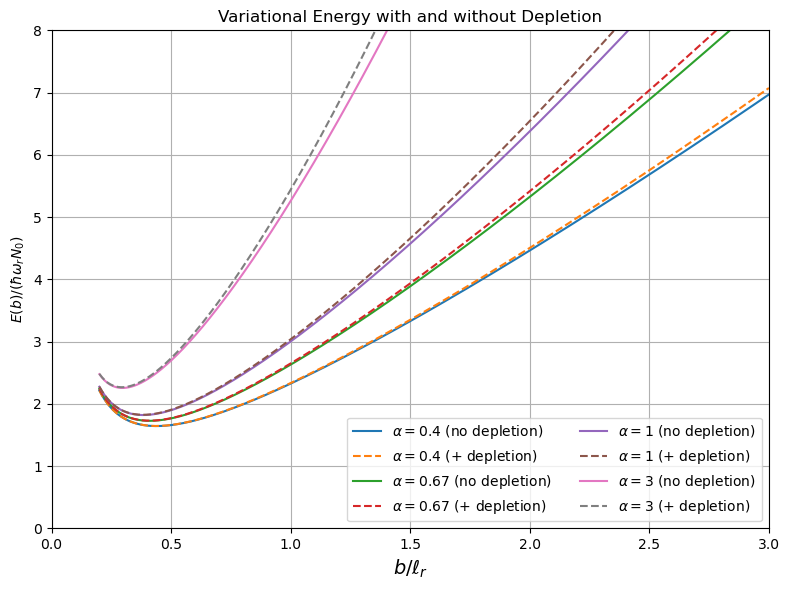

In [17]:
#| label: fig-energy
#| fig-cap: Energy per particle in units of $\hbar \omega$ vs variational parameter in units of $l_r$
# a_s/l_r = 0.01
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def E_b(b, alpha):
    return (3*b/2) + (3/(8*b)) + ((2*alpha*b**(3/2)) / np.sqrt(np.pi))
b_vals = np.linspace(0.2, 3, 500)
alpha_vals = [0.4, 0.67, 1, 3]

def dE_db(b,alpha):
    return (3/2) - (3/(8*b**2)) + ((3*alpha*np.sqrt(b)) / np.sqrt(np.pi))

def dE_dep_db(b,alpha):
    return (3/2) - (3/(8*b**2)) + ((3*alpha*np.sqrt(b)) / np.sqrt(np.pi)) + ((48*0.01*alpha**(3/2)*2**(15/4) * (b**(5/4))) / 5**(3/2))

def E_b_dep(b, alpha):
    return (3*b/2) + (3/(8*b)) + ((2*alpha*b**(3/2)) / np.sqrt(np.pi)) + ((64*0.01*np.pi**(-7/4)*alpha**(3/2) * 2**(15/4) * b**(9/4)) / (3 * 5**(3/2)))


    
root = []
roots = []
for alpha in alpha_vals:
    r1 = newton(lambda b: dE_db(b, alpha), x0=0.4)
    r2 = newton(lambda b: dE_dep_db(b,alpha), x0=0.1)
    root.append(r1)
    roots.append(r2)
print(len(root))
print(len(roots))

plt.figure(figsize=(8, 6))

for alpha in alpha_vals:        
    plt.plot(
        b_vals, 
        E_b(b_vals, alpha), 
        linestyle="-", 
        label=fr"$\alpha = {alpha}$ (no depletion)"
    )
    plt.plot(
        b_vals, 
        E_b_dep(b_vals, alpha), 
        linestyle="--", 
        label=fr"$\alpha = {alpha}$ (+ depletion)"
    )

# Markers for minima
#for alpha, r1 in zip(alpha_vals, root):
    #plt.plot(r1, E_b(r1, alpha), "o", color="black", markersize=6)
#for alpha, r2 in zip(alpha_vals, roots):
    #plt.plot(r2, E_b_dep(r2, alpha), "s", color="red", markersize=6)

plt.xlabel(r"$b/\ell_r$", fontsize=14)
plt.ylabel(r"$E(b)/(\hbar \omega_r N_0)$")
plt.title("Variational Energy with and without Depletion")

plt.ylim(0, 8)
plt.xlim(0, max(b_vals))
plt.grid(True)
plt.legend(loc="lower right", ncol=2)
plt.tight_layout()
plt.savefig("graph1.png")
plt.show()


# Density Profiles for Variational Approach 

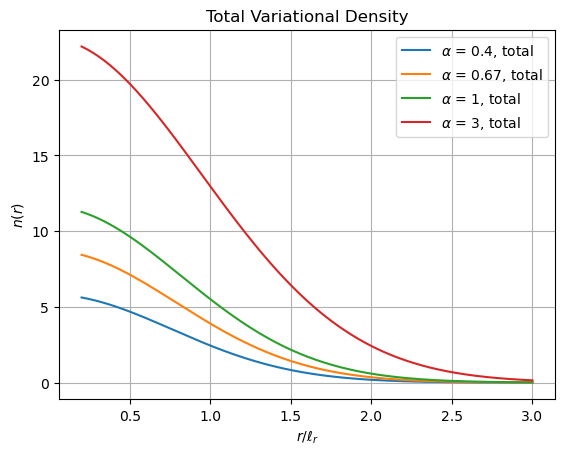

In [18]:
def dep_density(b,r,alpha):
    return 8*(alpha**(3/2))*((2*b)**(9/4))* (np.exp(-3*b*r**2)) / (3*(np.pi)**(11/4))

def total_density(b,r,alpha):
    return ((alpha)* 100*((2*b/np.pi)**(3/2)) * (np.exp(-2*b*r**2))) + (8*(alpha**(3/2))*((2*b)**(9/4))* (np.exp(-3*b*r**2)) / (3*(np.pi)**(11/4)))
    
def condensate_density(b,r,alpha):
    return (alpha)*100*((2*b/np.pi)**(3/2)) * (np.exp(-2*b*r**2)) 

r = np.linspace(0.2,3,500)


for alpha, r3 in zip(alpha_vals,roots):
    plt.plot(r, total_density(r3,r,alpha),label=f"$\\alpha$ = {alpha}, total" )
plt.title("Total Variational Density")
plt.xlabel(r"$r/ \ell_r$")
plt.ylabel(r"$n(r)$")
plt.legend()   
plt.grid(True)
plt.savefig("graph2.png")
plt.show()

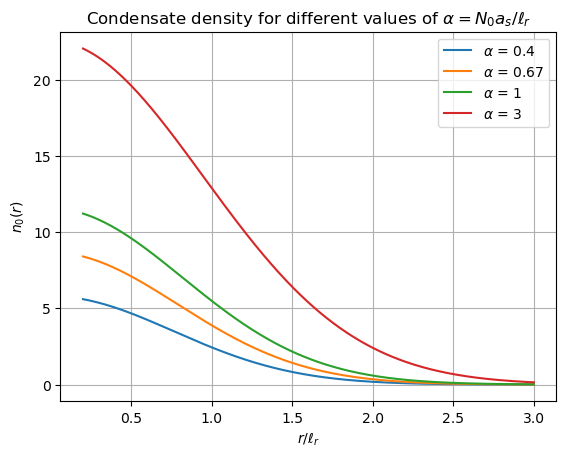

In [19]:
for alpha,r3 in zip(alpha_vals,roots):
    plt.plot(r,condensate_density(r3,r,alpha), label=f"$\\alpha$ = {alpha}")
plt.title("Condensate density for different values of $\\alpha = N_0 a_s / \ell_r$")    
plt.xlabel(r"$r/ \ell_r$")
plt.ylabel(r"$n_0(r)$")
plt.grid(True)
plt.legend()
plt.savefig("graph3.png")
plt.show()


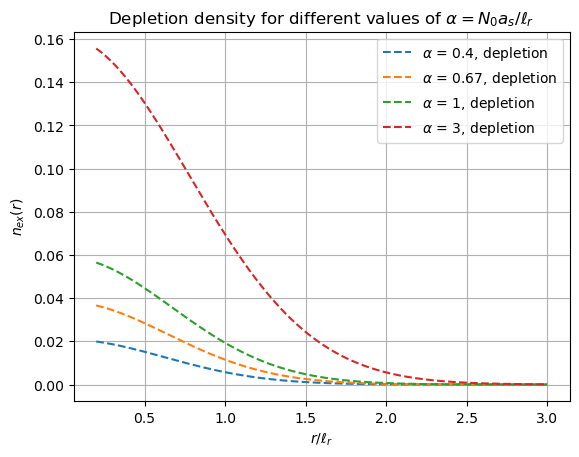

In [20]:
for alpha, r3 in zip(alpha_vals,roots):
    plt.plot(r, dep_density(r3,r,alpha), label=f"$\\alpha$ = {alpha}, depletion", linestyle="dashed")


plt.title("Depletion density for different values of $\\alpha = N_0 a_s / \ell_r$")    
plt.xlabel(r"$r/ \ell_r$")
plt.ylabel(r"$n_{ex}(r)$")
plt.grid(True)
plt.legend()
plt.savefig("graph4.png")
plt.show()

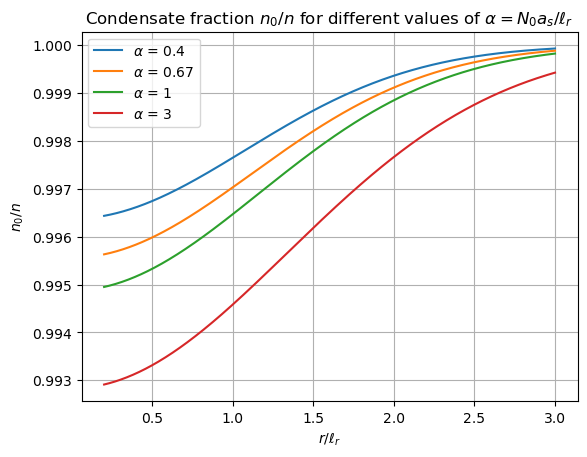

In [21]:
for alpha, r3 in zip(alpha_vals,roots):
    plt.plot(r, 1 - ((8 /(3*np.sqrt(np.pi)))*np.sqrt(((alpha)*0.0001*((2*r3/np.pi)**(3/2)) * (np.exp(-2*r3*r**2))) + (8*0.000001*(alpha**(3/2))*((2*r3)**(9/4))* (np.exp(-3*r3*r**2)) / (3*(np.pi)**(11/4))))) ,label=f"$\\alpha$ = {alpha}" )
plt.title("Condensate fraction $n_0 / n$ for different values of $\\alpha = N_0 a_s / \ell_r$")    
plt.xlabel(r"$r/ \ell_r$")
plt.ylabel(r"$n_0 / n$")
plt.grid(True)
plt.legend()
plt.savefig("graph5.png")
plt.show()

In [22]:
scaled_int = []
from scipy import integrate
for alpha, r3 in zip(alpha_vals,roots):
    res  = integrate.trapezoid(total_density(r3,r,alpha),r)
    scaled_int.append(res)

1.0
1.0
1.0
1.0


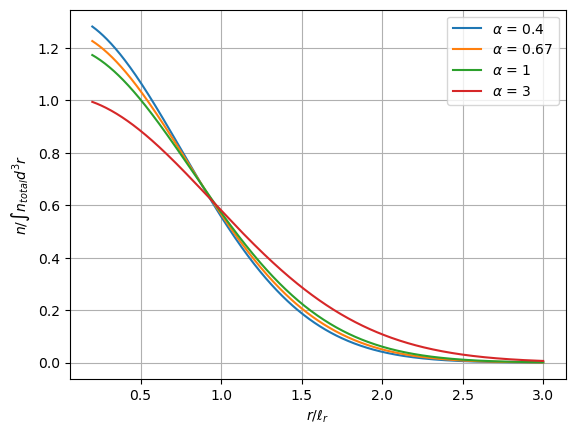

In [34]:

for alpha, r3, i in zip(alpha_vals, roots, scaled_int):
    plt.plot(r,total_density(r3,r,alpha) / (i) , label=f"$\\alpha$ = {alpha}" )
    print(integrate.trapezoid(total_density(r3,r,alpha),r)/i )

plt.xlabel(r"$r/ \ell_r$")
plt.ylabel(r"$n/ \int n_{total} d^3r$")
plt.grid(True)
plt.legend()
plt.show()    